Calculating the area of the Western Arctic and Eastern Arctic polygons for the CIS ice charts used in this study Figure B1

From the documentation:
The AREA field in the shapefiles is calculated automatically by the GIS software, so this change in projection affects the units of measurement for the AREA field. For shapefiles from 01 March 2006 through 24 July 2011 the AREA field is in square degrees. For shapefiles after 24 July 2011, the AREA field is in square meters. Since the area of a polygon depends on the map projection, if you wish to use a different projection, you should re-calculate the polygon areas under that different projection. Also, if you need to compare polygon areas, please ensure that the areas are calculated under the same map projection.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import geopandas as gpd

In [2]:
areas_list = []

for year in range(2010,2023):
    w_directory = sorted(glob.glob('/Users/amyswiggs/Desktop/Autumn2023/Chapter2/Northumbria_Spring_Data/NWP_SIC/CIS/'+str(year)+'/*SGRDRWA*/*.shp'))
    e_directory = sorted(glob.glob('/Users/amyswiggs/Desktop/Autumn2023/Chapter2/Northumbria_Spring_Data/NWP_SIC/CIS/'+str(year)+'/*SGRDREA*/*.shp'))

    for w_file,e_file in zip(w_directory,e_directory):
        w_filename = os.path.basename(w_file)
        
        w_data0 = gpd.read_file(w_file)
        w_data = w_data0.dropna(subset=['CT'])
        w_data_reproj = w_data.to_crs('EPSG:6931')
        area_values_w = w_data_reproj.geometry.area
        
        e_data0 = gpd.read_file(e_file)
        e_data = e_data0.dropna(subset=['CT'])
        e_data_reproj = e_data.to_crs('EPSG:6931')
        area_values_e = e_data_reproj.geometry.area

        areas_list.extend(area_values_w)
        areas_list.extend(area_values_e)

areas_list_km2 = [area / 1e6 for area in areas_list] 

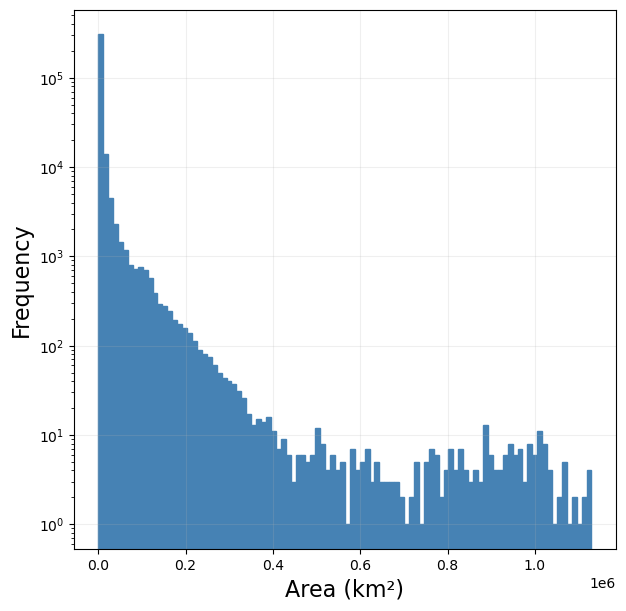

In [3]:
fig_a, ax_a = plt.subplots(figsize=[7,7])
plt.rcParams.update({'font.size': 14})

ax_a.hist(areas_list_km2, bins=100, edgecolor='steelblue',facecolor='steelblue',log=True)
ax_a.xaxis.grid(True,'major',alpha=0.2)
ax_a.yaxis.grid(True,'major',alpha=0.2)
ax_a.set_ylabel('Frequency', fontsize = 16)
ax_a.set_xlabel('Area (km²)', fontsize = 16)
plt.show()

fig_a.savefig('/Users/amyswiggs/Desktop/Autumn2023/Chapter2/Northumbria_Spring_Data/NWP_SIC_Plots/ReSubmission_Plots/FigB1_CIS_Areas.png',dpi=300,bbox_inches="tight")
